In [ ]:
import pandas
import numpy
from matplotlib import pyplot

# Check momentum

## Method

Use moving average from different time to indicate momentum.

We compare the differences between moving the average of a shorter period of time that is closer to the current timepoint and the moving average of a longer period before the previous period.

E.g. sample indicator = 20d MA - (200d - 20d) moving average

## Step

1. Read data and clean it. Use close time at the time period.

2. Calculate different indicators.

3. For each indicator, draw a graph to show the price change and the momentum indicator.

0         8739.0
1         8743.0
2         8723.7
3         8708.1
4         8784.4
          ...   
34474    39641.0
34475    39743.0
34476    39726.0
34477    39593.0
34478    39624.0
Name: close, Length: 34479, dtype: float64


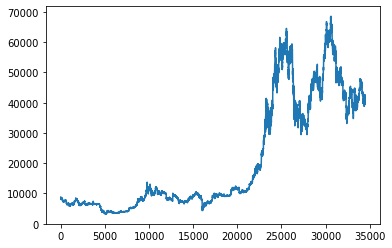

In [ ]:
sample_data = pandas.read_csv("Bitfinex_BTCUSD_1h.csv")
# print(sample_data)
data_close = sample_data["close"][::-1].reset_index(drop=True)
print(data_close)
pyplot.plot(data_close)


0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
34474    40992.153013
34475    40896.719679
34476    40793.086346
34477    40687.613735
34478    40580.713735
Name: close, Length: 34479, dtype: float64
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
34474   -1479.013136
34475   -1327.579803
34476   -1163.279803
34477   -1047.610801
34478    -921.210801
Name: close, Length: 34479, dtype: float64


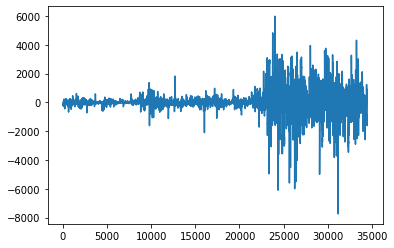

In [ ]:
# Test case: 6h moving average vs. 30h
ma_6h  = data_close.rolling(6).mean()
ma_30h = data_close.rolling(30).mean().shift(6)
indicator = ma_6h - ma_30h
print(ma_30h)
print(indicator)
pyplot.plot(indicator)
pyplot.hlines(y=0, xmin=0, xmax=len(ma_30h), colors="r")
# pyplot.close()

In [ ]:
def find_moving_indicator(data, closer, previous):
    ma1 = data.rolling(closer).mean()
    ma2 = data.rolling(previous).mean().shift(closer)
    indicator = ma1 - ma2
    return indicator

Text(0.5, 1.0, 'Momentum Checking with MA')

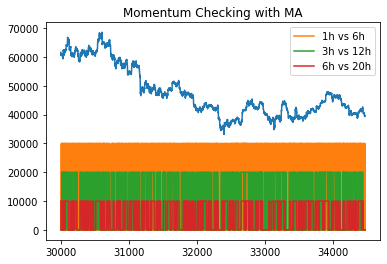

In [ ]:
indicator_1 = find_moving_indicator(data_close, 1, 6)
indicator_2 = find_moving_indicator(data_close, 3, 12)
indicator_3 = find_moving_indicator(data_close, 6, 20)
indicator_4 = find_moving_indicator(data_close, 12, 40)
indicator_5 = find_moving_indicator(data_close, 30, 70)
indicator_6 = find_moving_indicator(data_close, 50, 200)
# Take the last 5000 as a sample to see if the momentum indicators work well
pyplot.plot(data_close[30000:])
pyplot.plot((indicator_1[30000:] > 0) * 30000, label = "1h vs 6h")
pyplot.plot((indicator_2[30000:] > 0) * 20000, label = "3h vs 12h")
pyplot.plot((indicator_3[30000:] > 0) * 10000, label = "6h vs 20h")
pyplot.legend()
pyplot.title("Momentum Checking with MA")

Text(0.5, 1.0, 'Momentum Checking with MA')

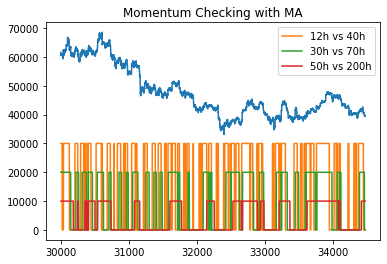

In [ ]:
pyplot.plot(data_close[30000:])
pyplot.plot((indicator_4[30000:] > 0) * 30000, label = "12h vs 40h")
pyplot.plot((indicator_5[30000:] > 0) * 20000, label = "30h vs 70h")
pyplot.plot((indicator_6[30000:] > 0) * 10000, label = "50h vs 200h")
pyplot.legend()
pyplot.title("Momentum Checking with MA")

The graph shows the trading is constantly dominated by momentum. No matter which indicator you use, you can always see a lot of momentum in the periods.

In [ ]:
def generate_ema_path(path_ticker, window, smooth):
    j = 0 # Check nan
    while pandas.isna(path_ticker[j]):
        j = j + 1
        # print(j)
    ema_path = pandas.Series(numpy.full(fill_value=numpy.nan, shape=len(path_ticker)), index=path_ticker.index)
    mean_first = path_ticker[j:window-1+j].mean()
    if window == 1:
        mean_first = path_ticker[j]
    multiplier = smooth/(1+window)
    ema_path[window-1+j] = mean_first
    for i in range(window+j, len(ema_path)):
        ema_path[i] = ema_path[i-1] * (1-multiplier) + path_ticker[i] * multiplier
    return ema_path


def generate_position_ema(path, window1, window2, strategy = 0):
    """
    Generate buy-sell position for a given data using exponential moving average
    Write a separate function to generate ema path
    :param data_dict: data_dictionary
    :param window1: first rolling window
    :param window2: second rolling window. it should always be larger than the first
    :param strategy: indicate whether we have short position. 0 = no short, 1 = have short
    :return:
    """
    # print("TYPE: ", type(close))
    # print(close)
    ma1 = generate_ema_path(path, window1, 2)
    # print(ma1)
    ma2 = generate_ema_path(path, window2, 2)
    compare_df = pandas.DataFrame()
    compare_df["Close"] = path
    compare_df["MA1"] = ma1
    compare_df["MA2"] = ma2
    # compare_df.plot()
    # pyp.show()
    # pyp.close()
    signal = ma1 - ma2
    x = signal > 0
    y = signal.notnull()
    position = x
    if strategy == 0:
        position = x * y * 1
    else:
        position = (x * 2 - 1) * y
    return position

Text(0.5, 1.0, 'Momentum Checking with EMA')

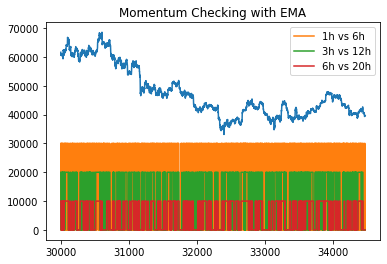

In [ ]:
indicator_1 = generate_position_ema(data_close, 1, 6)
indicator_2 = generate_position_ema(data_close, 3, 12)
indicator_3 = generate_position_ema(data_close, 6, 20)
indicator_4 = generate_position_ema(data_close, 12, 40)
indicator_5 = generate_position_ema(data_close, 30, 70)
indicator_6 = generate_position_ema(data_close, 50, 200)
# Take the last 5000 as a sample to see if the momentum indicators work well
pyplot.plot(data_close[30000:])
pyplot.plot((indicator_1[30000:] > 0) * 30000, label = "1h vs 6h")
pyplot.plot((indicator_2[30000:] > 0) * 20000, label = "3h vs 12h")
pyplot.plot((indicator_3[30000:] > 0) * 10000, label = "6h vs 20h")
pyplot.legend()
pyplot.title("Momentum Checking with EMA")

Text(0.5, 1.0, 'Momentum Checking with EMA')

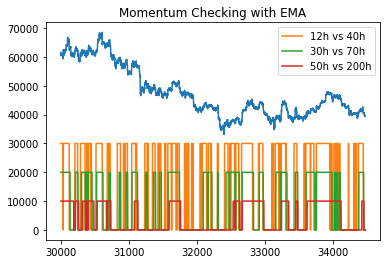

In [ ]:
pyplot.plot(data_close[30000:])
pyplot.plot((indicator_4[30000:] > 0) * 30000, label = "12h vs 40h")
pyplot.plot((indicator_5[30000:] > 0) * 20000, label = "30h vs 70h")
pyplot.plot((indicator_6[30000:] > 0) * 10000, label = "50h vs 200h")
pyplot.legend()
pyplot.title("Momentum Checking with EMA")